<a href="https://colab.research.google.com/github/gmldud/Deliverate_Practice/blob/main/%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8_%EA%B0%9C%EC%9D%B8_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)

# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요


## 데이터 다운로드
--- 
아래 셀을 실행시켜 데이터를 colab에 불러옵니다.  
셀 실행은 Ctrl + Enter 를 이용해 실행 시킬 수 있습니다. 

In [149]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3gLj0Q6'

import zipfile
with zipfile.ZipFile('3gLj0Q6', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-08-10 00:34:27--  https://bit.ly/3gLj0Q6
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E [following]
--2022-08-10 00:34:27--  https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E
Resolving drive.google.com (drive.google.com)... 108.177.119.139, 108.177.119.138, 108.177.119.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oo8np442c1qfs3a283fe30lqtp9h2d2d/1660091625000/17946651057176172524/*/1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E?e=download&uuid=c0f61c35-c9bc-4fde-897d-b7af8dec809e [following]
--2022-08-10 00:34:28--  https://doc-0c-10-doc

## 라이브러리 불러오기
---
아래 셀을 실행시켜 pandas 와 DecisionTreeClassifier 를 불러옵니다.

In [150]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import OrdinalEncoder
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## 데이터 불러오기
---
아래 셀을 실행시켜 csv 파일 데이터를 DataFrame 객체로 불러옵니다.

In [152]:
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')

In [153]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [154]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [155]:
train.describe(include ="all")

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [156]:
test.describe(include ="all")

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


In [157]:
print(train.isnull().sum(),"\n",test.isnull().sum()) 

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64 
 id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64


In [158]:
print(train.dtypes, "\n", train.shape)

id                          int64
hour                        int64
hour_bef_temperature      float64
hour_bef_precipitation    float64
hour_bef_windspeed        float64
hour_bef_humidity         float64
hour_bef_visibility       float64
hour_bef_ozone            float64
hour_bef_pm10             float64
hour_bef_pm2.5            float64
count                     float64
dtype: object 
 (1459, 11)


In [159]:
print(test.dtypes, "\n", test.shape)

id                          int64
hour                        int64
hour_bef_temperature      float64
hour_bef_precipitation    float64
hour_bef_windspeed        float64
hour_bef_humidity         float64
hour_bef_visibility       float64
hour_bef_ozone            float64
hour_bef_pm10             float64
hour_bef_pm2.5            float64
dtype: object 
 (715, 10)


In [160]:
'''
sns.countplot(x="class", data=train)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()
'''
#hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5 76,90,117 / 1459 *100 5~8퍼센트 결측치
#hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5 35,37,36 / 715 *100 5퍼센트 결측치  #결측치 제거를 했어야 했는가?

'\nsns.countplot(x="class", data=train)\nplt.title("타이타닉호의 각 클래스별, 승객 수")\nplt.show()\n'

In [161]:
print(train.columns, "\n", test.columns)

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object') 
 Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')


In [162]:
def distplot(df):
  for i in list(df.columns):
    print(f"sns.distplot(df[{i}])")

distplot(train)

sns.distplot(df[id])
sns.distplot(df[hour])
sns.distplot(df[hour_bef_temperature])
sns.distplot(df[hour_bef_precipitation])
sns.distplot(df[hour_bef_windspeed])
sns.distplot(df[hour_bef_humidity])
sns.distplot(df[hour_bef_visibility])
sns.distplot(df[hour_bef_ozone])
sns.distplot(df[hour_bef_pm10])
sns.distplot(df[hour_bef_pm2.5])
sns.distplot(df[count])


In [163]:
'''
def distplot(df):
  for i in list(train.columns):
    plot = sns.distplot(df[i])
    plt.title(i)
    print(plot)
    '''

'\ndef distplot(df):\n  for i in list(train.columns):\n    plot = sns.distplot(df[i])\n    plt.title(i)\n    print(plot)\n    '

In [164]:
'''
def distplot(df):
  for i in list(train.columns):
    sns.distplot(df[i])
    plt.title(i)
    '''

'\ndef distplot(df):\n  for i in list(train.columns):\n    sns.distplot(df[i])\n    plt.title(i)\n    '

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


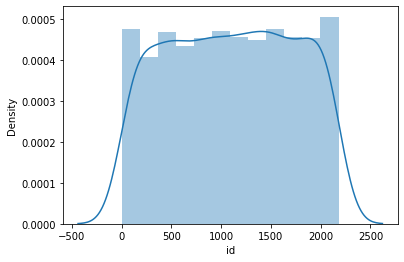

In [165]:
sns.distplot(train['id'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


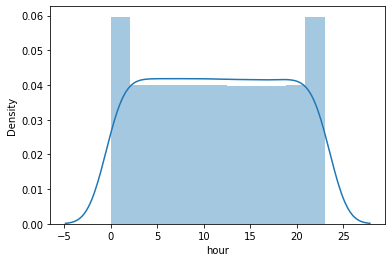

In [166]:
sns.distplot(train['hour'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


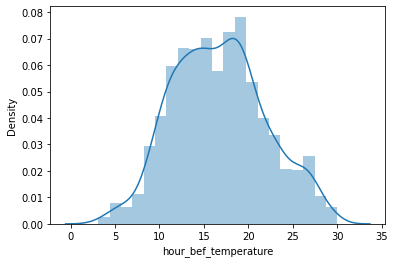

In [167]:
sns.distplot(train['hour_bef_temperature'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


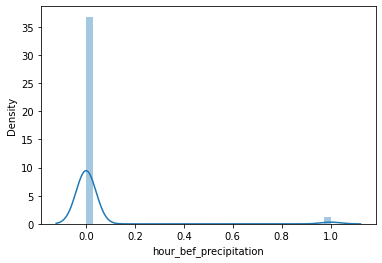

In [168]:
sns.distplot(train['hour_bef_precipitation'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


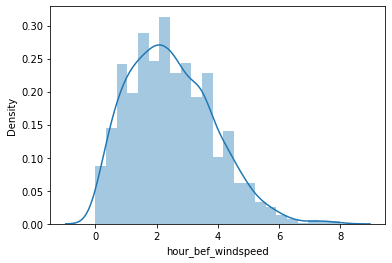

In [169]:
sns.distplot(train['hour_bef_windspeed'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


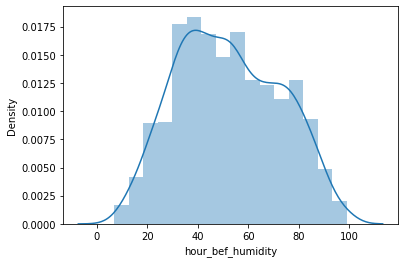

In [170]:
sns.distplot(train['hour_bef_humidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


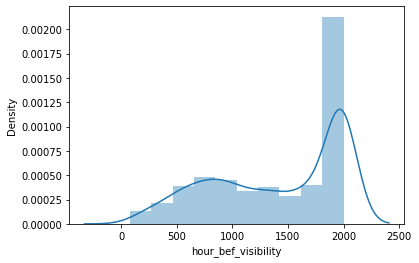

In [171]:
sns.distplot(train['hour_bef_visibility'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


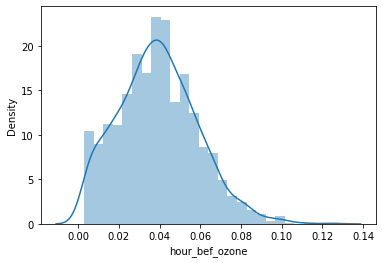

In [172]:
sns.distplot(train['hour_bef_ozone'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


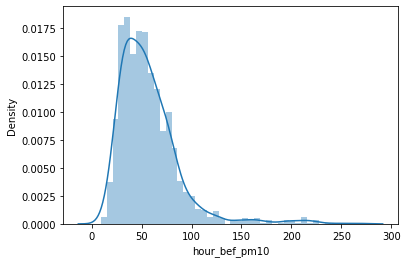

In [173]:
sns.distplot(train['hour_bef_pm10'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


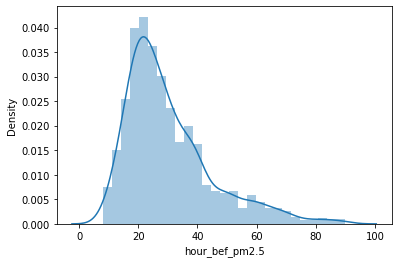

In [174]:
sns.distplot(train['hour_bef_pm2.5'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


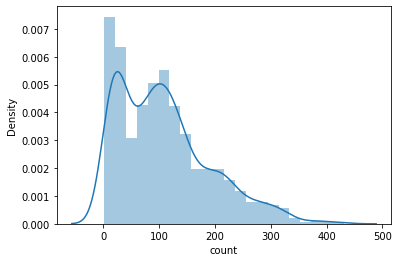

In [175]:
sns.distplot(train['count'])

In [176]:
distplot(test)

sns.distplot(df[id])
sns.distplot(df[hour])
sns.distplot(df[hour_bef_temperature])
sns.distplot(df[hour_bef_precipitation])
sns.distplot(df[hour_bef_windspeed])
sns.distplot(df[hour_bef_humidity])
sns.distplot(df[hour_bef_visibility])
sns.distplot(df[hour_bef_ozone])
sns.distplot(df[hour_bef_pm10])
sns.distplot(df[hour_bef_pm2.5])


In [177]:
'''
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
'''

'\nhour_bef_temperature        2\nhour_bef_precipitation      2\nhour_bef_windspeed          9\nhour_bef_humidity           2\nhour_bef_visibility         2\nhour_bef_ozone             76\nhour_bef_pm10              90\nhour_bef_pm2.5            117\n'

In [178]:
train.loc[train['hour_bef_pm2.5'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
33,56,21,10.2,0.0,0.5,84.0,1668.0,0.021,24.0,NaN,127.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
100,149,16,15.8,0.0,5.3,17.0,1923.0,0.047,NaN,NaN,102.0
...,...,...,...,...,...,...,...,...,...,...,...
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0
1378,2066,11,10.1,0.0,1.5,59.0,990.0,0.015,39.0,NaN,78.0
1391,2086,1,11.5,0.0,3.2,23.0,2000.0,NaN,NaN,NaN,42.0
1398,2096,20,14.0,0.0,2.9,35.0,910.0,0.061,NaN,NaN,117.0


## 전처리
---
train 은 interpolate() 를 이용해 결측치를 DataFrame 값에 선형으로 비례하여 보간합니다.
test 의 결측치는 0으로 채워줍니다.

In [179]:
train.interpolate(inplace=True)
test.fillna(0, inplace=True)

In [180]:
list(train.columns)
list(test.columns)

['id',
 'hour',
 'hour_bef_temperature',
 'hour_bef_precipitation',
 'hour_bef_windspeed',
 'hour_bef_humidity',
 'hour_bef_visibility',
 'hour_bef_ozone',
 'hour_bef_pm10',
 'hour_bef_pm2.5']

In [181]:
print(train.isnull().sum(),"\n",test.isnull().sum())

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64 
 id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64


In [182]:
# 앞 과정에서 파악된 변수 중요도가 낮은 피쳐드를 제거합니다.

X_train = train.drop(['count', 'id'], axis=1)
Y_train = train['count']
test = test.drop(['id'], axis=1)

In [183]:
print(train.shape,"\n",test.shape, "\n",X_train.shape, "\n",Y_train.shape) 

(1459, 11) 
 (715, 9) 
 (1459, 9) 
 (1459,)


In [184]:
'''
#코랩 데이터 다운로드
!wget 'https://bit.ly/3gLj0Q6'

import zipfile
with zipfile.ZipFile('3gLj0Q6', 'r') as existing_zip:
    existing_zip.extractall('data')

#라이브러리
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

#데이터 불러오기
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')

#전처리(다른버전)
train.interpolate(inplace=True)
test.interpolate(inplace=True) #다른 버전test.fillna(0, inplace=True)
'''

"\n#코랩 데이터 다운로드\n!wget 'https://bit.ly/3gLj0Q6'\n\nimport zipfile\nwith zipfile.ZipFile('3gLj0Q6', 'r') as existing_zip:\n    existing_zip.extractall('data')\n\n#라이브러리\nimport pandas as pd\nfrom sklearn.ensemble import RandomForestRegressor\n\n#데이터 불러오기\ntrain = pd.read_csv('data/train.csv') \ntest = pd.read_csv('data/test.csv')\n\n#전처리(다른버전)\ntrain.interpolate(inplace=True)\ntest.interpolate(inplace=True) #다른 버전test.fillna(0, inplace=True)\n"

## 👋 실습
---

In [185]:
from scipy.stats import randint, uniform

pipe = make_pipeline(
    TargetEncoder(), 
    RandomForestRegressor(random_state=2)
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, Y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [186]:
'''
# 각 X_train에 대해 모델 훈련을 해주세요.
model1 = RandomForestRegressor(criterion = 'mse', random_state = 0 )
#model1.fit(X_train, Y_train)
#pred1 = model1.predict(test)

params = {'n_estimators': [200, 300, 500],
          'max_features': [5, 6, 8],
          'min_samples_leaf': [1, 3, 5]}

greedy_CV1 = GridSearchCV(model1, param_grid=params, cv = 3, n_jobs = -1)
greedy_CV1.fit(X_train, Y_train)
'''
pred1 = greedy_CV1.predict(test)

In [187]:
# 각 결과들을 submission 파일로 저장해주세요.
submission_s = pd.read_csv('data/submission.csv')

submission_s['count'] = pred1

submission_s.to_csv('sub_11.csv',index=False)


In [188]:
import numpy as np

#submission['count'] = np.round(pred, 2)

In [189]:
#submission.head()

In [190]:
#submission.to_csv('sub.csv',index=False)

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)